## 决策树 


> <font color=#0099ff size=4 face="黑体">决策树学习通常包括三个步骤：特征选择、决策树的生成和决策树的修剪</font>



### 基本流程

决策树包含一个根节点、若干个内部节点和叶子节点，叶节点对应决策结果，其他的对应一个属性，从根节点到每个叶节点的路径对应一个判定测试序列。其目的是学习一棵泛化能力强，遵循**分而治之，divide-and-conquer**。

![](https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/4_2.png?raw=true)

### 划分选择

如何划分，分支节点所包含的样本尽可能属于同一类别，即*纯度，purity*更高。

#### 信息增益

**信息熵**：样本集合D中不同类别的比例$p_k,k=1,\dots,|D|$, 则

$$Ent(D)=-\sum_{k=1}^{|D|} p_k\log_2p_k$$

越小纯度越高，最小值为0，[最大值为$\log_2|D|$](https://blog.csdn.net/feixi7358/article/details/83861858)

在某属性a上，不同其不同取值来对数据D进行划分，记为$D^v$,然后根据节点所包含样本数不同而赋予不同权重$|D^v|/|D|$,即样本数越多的分支节点的影响越大，则可以算出属性a对样本D进行划分所获的**信息增益**：

$$Gain(D,a)=Ent(D)-\sum_{v=1}^V\frac{|D^v|}{|D|} Ent(D^v)$$

**ID3**：选择信息增益最大来选择属性，*信息增益越大，则意味着属性a划分所得的纯度提升越大。*

#### 增益率

**CD4.5**：信息增益对可取值数目较多的属性有偏好，可以选择**信息增益率**进行属性选择：

$$Gain_ratio(D,a)=\frac{Gain(D,a)}{IV(a)}$$

**属性a固有值**：intrinsic value

$$IV(a)=-\sum_{v=1}^V\frac{|D^v|}{|D|}\log_2 \frac{|D^v|}{|D|}$$

但是其偏好数值较少的属性，**启发式**，先从候选划分中找出信息增益率高于平均的属性，在从中选择增益率最高的。

#### 基尼指数

**CART**决策树,*采用Gini index最小的属性进行划分*，其直观反映随机抽取两个样本标记不一致的概率，越小越好纯度越高。基尼值：

$$Gini(D)=\sum_{k=1}^{|Y|}\sum_{k‘\neq k} p_k p_k’=1-\sum_{k=1}^{|Y|}p_k^2$$

基尼指数：

$$Gini_index(D,a)=\sum_{v=1}^V \frac{|D^v|}{|D|} Gini(D^v)$$

### 剪枝处理 pruning

为防止过拟合，也即训练样本太好树的分支太多的情况，可以主动去掉一些分支。

- 预剪枝，prepruning，每次对划分前后的泛化性能进行估计--测试集，降低过拟合的风险同时减少时间开销。但是可能会导致欠拟合。

![](https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/4_6.png?raw=true)

- 后剪枝，postpruning

![](https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/4_7.png?raw=true)

### 连续与缺失值

- 连续值处理，**连续属性离散化**，如C4.5二分类，
  - 连续值n个选择，从小到大排序，则有n-1个划分，选择划分使得信息增益最大。

- 缺失值处理
   - 缺失比例作为信息增益的权重，得到信息增益的推广

### 多变量决策树 multivariate decision tree

属性视为坐标空间，则属性描述的样本即其中的数据点，分类即寻找合适的边界，且该边界与坐标轴分段平行。

![](https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/4_12.png?raw=true)

**在多变量决策时，非节点处对属性的线性组合构造分类器**，如OC1，贪心寻找每个属性的最优权值。

![](https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/4_14.png?raw=true)

### 阅读材料


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

In [15]:
X

array([[  6.46907649,   4.25070317,  -8.63694437, ...,  -0.48172814,
         -6.44996141,  -2.65984972],
       [  6.48856404,   9.37957037,  10.32791736, ...,   3.37542134,
          7.41273719,  -9.72284371],
       [  8.37392753, -10.14342267,  -3.52753613, ...,  -7.31536045,
         -2.33070872,   6.44087163],
       ...,
       [  7.86551596,   6.19525794,   4.773955  , ...,   4.93452091,
         -4.52137856,   6.28178851],
       [-10.41156442,   1.40054826,  -1.97349572, ...,  -3.18210433,
          7.59487579,   4.62753678],
       [  7.40908901,  -7.3908382 ,  10.78350645, ...,  -3.26219501,
          5.73727272,  -4.97354916]])

In [16]:
print(X.shape)

(10000, 10)


In [20]:
y

array([85, 64, 93, ..., 98, 80, 91])

In [ ]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()                               

In [4]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()                               

0.9997

In [5]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5) 
scores.mean()

1.0

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
    max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))  

5.009154859960319

MSE: 6.4412


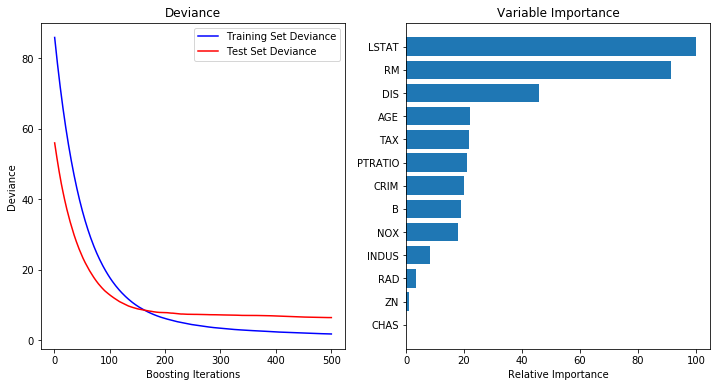

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()